# 5. Model Selection 모듈
1) 학습데이터, 테스트 데이터 분리(호출시 무작위로 데이터 분리)

2) 교차 검증

3) 하이퍼 파라미터 지원

## 1) 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test  =  train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 0)

+ test_size: 전체 데이터에서 테스트 데이터 세트 크기 샘플링. (디폴트: 0.25)
+ train_size: 전체 데이터에서 학습 데이터 세트 크기 샘플링. 통상적으로 test_size를 사용
+ shuffle: 데이터 분리 전에 미리 섞을지 여부. 데이터를 분산시켜 좀 더 효율적인 학습 및 테스트 데이터 세트 만드는데 사용 (디폴트: True) 
+ random_state: 호출 할 때마다 동일한 학습/테스트 데이터 세트를 생성하기 위해 주어지는 난수 값.

### (1-1) 학습 데이터 세트
+ 머신러닝 알고리즘의 학습을 위해 사용
+ 데이터의 속성들과 결정값(레이블값) 모두 갖고있음
+ 학습 데이터를 기반으로 머신러닝 알고리즘이 데이터 속성과 결정값의 패턴을 인지하고 학습

### (1-2) 테스트 테이터 세트
+ 테스트 데이터 세트에서 학습된 머신러닝 알고리즘을 테스트.
+ 테스트 데이터는 속성 데이터만 머신러닝 알고리즘에 제공, 머신러닝 알고리즘은 제공된 데이터를 기반으로 결정값을 예측
+ 테스트 데이터는 학습 데이터와 별도의 데이터 세트로 제공되어야 함.

#### ⅰ)  ndarray 데이터세트 분리

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:
# 1. 데이터셋 객체 생성
iris = load_iris()

# 2. 모델 객체 생성
dt_clf = DecisionTreeClassifier()

# 3. 데이터 담기
train_data = iris.data

# 4. 결과값(레이블값) 담기 
train_label = iris.target

# 5. 모델 학습
dt_clf.fit(train_data, train_label)

# 6. 학습데이터셋 결과 예측
pred = dt_clf.predict(train_data)  # => 반드시 테스트 데이터로 결과예측해야함! 
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [26]:
# 1. 데이터셋 객체 생성
iris_data = load_iris()

# 2. 모델 객체 생성
dt_clf = DecisionTreeClassifier()

# 3. 학습 / 테스트 데이터 나눠 담기 
X_train,X_test, y_train, y_test= train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)

# 4. 모델 학습
dt_clf.fit(X_train, y_train)

# 5. 테스트 데이터셋 결과 예측
pred = dt_clf.predict(X_test)
print('예측 정확도: ', accuracy_score(y_test, pred))

print(type(pred))

예측 정확도:  0.9555555555555556
<class 'numpy.ndarray'>


#### ⅱ) DataFrame 데이터 분리
+ 넘파이 ndarray뿐만 아니라 판다스 DataFrame / Series도 train_test_split()으로 분할 가능

In [16]:
import pandas as pd

In [27]:
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
iris_df['target'] = iris_data.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
feature_df = iris_df.iloc[:, :-1]
target_df = iris_df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size = 0.3, random_state = 1)

In [31]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [32]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도:', accuracy_score(y_test, pred))

예측 정확도: 0.9555555555555556


## 2) 교차 검증
+ 학습 데이터를 다시 분할하여 학습 데이터와 학습된 모델의 성능을 1차 평가하는 검증 데이터로 나눔
+ 모든 학습 / 검증 과정이 완료된 후 최종적으로 테스트 데이터세트로 성능 평가

### (2-1) K-Fold 교차 검증
1) 일반 K 폴드
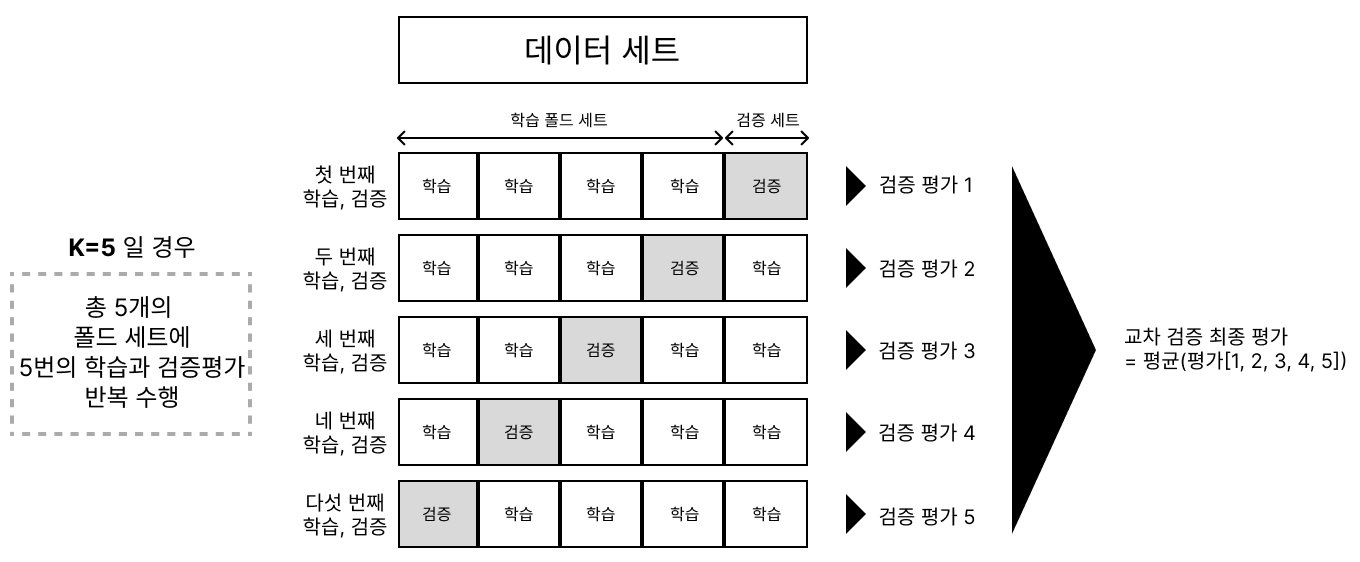


2) Stratified K 폴드
  + 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 방식
  + 학습 데이터와 검증 데이터 세트가 가지는 레이블 분포도가 유사하도록 검증데이터 추출

#### 1) 일반 K 폴드

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

import numpy as np

In [40]:
iris = load_iris()
features = iris.data
labels = iris.target
dt_clf = DecisionTreeClassifier(random_state = 2)

kfold = KFold(n_splits = 5)
cv_accuracy = [] # 평균 정확도 담을 리스트 객체 생성
print('붓꽃 데이터 세트 크기:', features.shape[0])
# 학습데이터세트: 120, 테스트 데이터세트: 30 

붓꽃 데이터 세트 크기: 150


In [47]:
n_iter = 0

# KFold 객체의 split() 호출하면 폴드 별 학습용, 검증용 데이터의 row 인덱스를 array로 반환
for train_idx, test_idx in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 데이터 추출
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter +=1
    
    # 반복 마다 정확도 측정
    accuracy = accuracy_score(y_test, pred)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print("\n#{0} 교차 검증 정확도: {1}, 학습데이터 크기: {2}, 검증데이터 크기: {3}".format(n_iter, accuracy, train_size, test_size))
    print("#{0} 검증 세트 인덱스: {1}".format(n_iter, test_idx))
    print(train_idx.
         )
    
    cv_accuracy.append(accuracy)
    
print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습데이터 크기: 120, 검증데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

#2 교차 검증 정확도: 0.9666666666666667, 학습데이터 크기: 120, 검증데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75 

#### 2) Stratified K 폴드

In [56]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [68]:
# 문제있는 k-fold 교차검증 
kfold = KFold(3)

n_iter = 0
for train_idx, test_idx in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_idx]
    label_test = iris_df['label'].iloc[test_idx]
    print("## 교차 검증: {0}".format(n_iter))
    print("학습 레이블 데이터 분포: \n", label_train.value_counts())
    print("검증 레이블 데이터 분포: \n", label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포: 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포: 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포: 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    50
Name: label, dtype: int64


In [62]:
# Stratified 교차검증
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(3)
n_iter = 0

for train_idx, test_idx in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_idx]
    label_test = iris_df['label'].iloc[test_idx] 
    
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포: 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포: 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포: 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64


In [66]:
dt_clf = DecisionTreeClassifier(random_state = 4)

skfold = StratifiedKFold(3)
n_iter = 0
cv_accuracy=[]
# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 셋도 입력! 
for train_idx, test_idx in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = accuracy_score(y_test, pred)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size , test_size))
    print('\n{0} 검증 세트 인덱스: {1}'.format(n_iter, test_idx))
    cv_accuracy.append(accuracy)
    
print('\n## 교차 검증별 정확도: ', np.round(cv_accuracy, 4))
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50

2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도:  [0.98 0.94 0.98]

## 평균 검증 정확도:  0.9666666666666667


### (2-2) cross_val_score( )
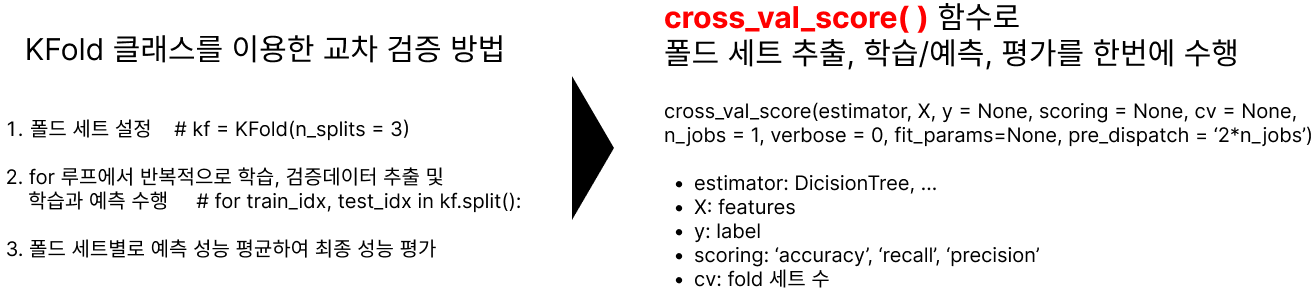

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score  # stratified kfold 로 함. 분류에서만
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# estimator: dt_clf(DecisionTreeClassifier)
# x(feature): data
# y(label): label
# scoring: 'accuracy'
# cv (fold 세트 수): 3
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)

print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### (2-3) GridSearchCV 
교차검증과 최적 하이퍼 파라미터 튜닝을 한번에
+ 사이킷런은 GridSearchCV를 이용해 Classifier 나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공

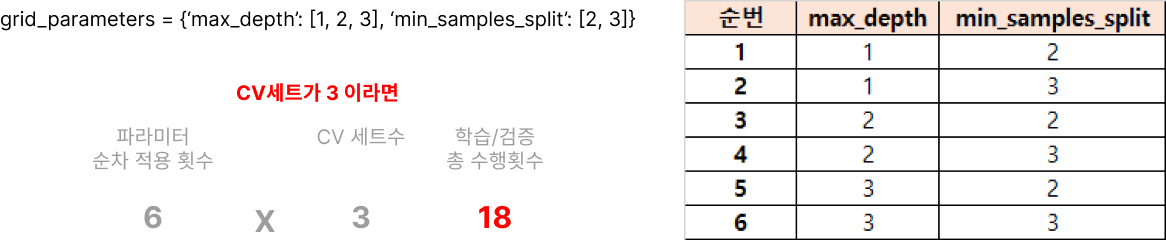

In [93]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.2, random_state = 5)

dtree= DecisionTreeClassifier()

# parameter들을 dictionary 형태로 설정. value값은 반드시 반드시 [] list형태로 설정! 하나여도! 
parameters = {'max_depth': [1,2,3], 'min_samples_split':[2,3]}

In [94]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 수행.
### refit = True가 default. True면 가장 좋은 파라미터 설정으로 재 학습 시킴. 
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True, return_train_score = True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 
grid_dtree.fit(X_train, y_train)  # 알아서 cv 값으로 나눠서 작업해줌 

# GridSearchCV 결과는 cv_results_라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
         'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675000,5,0.675,0.675,0.675
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675000,5,0.675,0.675,0.675
2,"{'max_depth': 2, 'min_samples_split': 2}",0.966667,1,1.000,0.950,0.950
3,"{'max_depth': 2, 'min_samples_split': 3}",0.966667,1,1.000,0.950,0.950
4,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,1.000,0.950,0.950
5,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,1.000,0.950,0.950


In [95]:
grid_dtree.cv_results_

{'mean_fit_time': array([0.00033251, 0.        , 0.        , 0.00066471, 0.00066487,
        0.0009973 ]),
 'std_fit_time': array([4.70246438e-04, 0.00000000e+00, 0.00000000e+00, 4.70021655e-04,
        4.70134046e-04, 3.37174788e-07]),
 'mean_score_time': array([0., 0., 0., 0., 0., 0.]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_samples_split': 2},
  {'max_depth': 3, 'min_samples_split': 3}],
 'split0_test_score': array([

In [96]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 2, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9667
테스트 데이터 세트 정확도: 0.9000


In [97]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_
print(estimator)
# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

DecisionTreeClassifier(max_depth=2)
테스트 데이터 세트 정확도: 0.9000
